In [101]:
import pandas as pd

In [102]:
# choose the target model and the config groups to compare

# target = "2024-04-07_18-15-53_brown-lot"
# config_groups = [
#     "Surrogate_Data_V1",
#     "Surrogate_Data_V2",
#     "Surrogate_Data_V3",
#     "Surrogate_Data_V4",
#     "Surrogate_Data_V5",
# ]
# howmanymodelspergroup = 10
# groups = ["0%", "25%", "50%", "75%", "100%"]

# target = "2024-05-06_11-25-19_honeydew-tough"
# config_groups = [
#     "NoAdv_Surrogate_Data_V1",
#     "NoAdv_Surrogate_Data_V2",
#     "NoAdv_Surrogate_Data_V3",
#     "NoAdv_Surrogate_Data_V4",
#     "NoAdv_Surrogate_Data_V5",
# ]
# howmanymodelspergroup = 6
# groups = ["0%", "25%", "50%", "75%", "100%"]

target = "2024-04-07_18-15-53_brown-lot"
config_groups = [
    "Surrogate_SVM_V1",
    "Surrogate_GBoost_V1",
    "Surrogate_NaiveBayes_V1",
    "Surrogate_LogReg_V1",
    "Surrogate_KNN_V1",
    "Surrogate_Data_V1",
]
howmanymodelspergroup = 6
groups = ["SVM", "GBoost", "NativeBayes", "LogReg", "KNN", "RF"]



results = pd.read_csv(f'results/target_{target}/transferability.csv')

In [103]:
# choose the metric to plot
metric = "samples_evaded_percentage"
# metric = "target_confidence_reduction_mean"

config_groups_results = []
for config_group in config_groups:
    config_group_results = results[results["config"] == config_group]
    # if more than 6, sample 6 random results
    if len(config_group_results) > howmanymodelspergroup:
        print(f"Sampling 6 random results from {config_group}")
        config_group_results = config_group_results.sample(6)
    if len(config_group_results) != howmanymodelspergroup:
        print(f"WARNING: {config_group} only has {len(config_group_results)} results")
    # filter out the results that have a total_samples_count of 400 (from extra tests)
    config_group_results = config_group_results[config_group_results["total_samples_count"] != 400]
    config_groups_results.append(config_group_results[metric].tolist())
print(config_groups_results)
print([len(group) for group in config_groups_results])

Sampling 6 random results from Surrogate_Data_V1
[[0.4876237623762376, 0.564993564993565, 0.4571759259259259, 0.5348027842227379, 0.5089285714285714, 0.490613266583229], [0.5988200589970502, 0.6192893401015228, 0.5826893353941267, 0.6358695652173914, 0.6641221374045801, 0.6049562682215743], [0.3609090909090909, 0.371939736346516, 0.3589981447124304, 0.3680870353581142, 0.3714788732394366, 0.3727106227106227], [0.4491228070175438, 0.4534574468085106, 0.4242038216560509, 0.4820224719101124, 0.4242424242424242, 0.439146800501882], [0.34375, 0.4205693296602387, 0.2909260991580917, 0.3510531594784353, 0.2872444011684518, 0.4004237288135593], [0.8431372549019608, 0.848816029143898, 0.8604060913705583, 0.8847826086956522, 0.8449197860962567, 0.8604166666666667]]
[6, 6, 6, 6, 6, 6]


Means: [0.5073563125883777, 0.6176244508893742, 0.36735391721270183, 0.44536596202275397, 0.3489944530464628, 0.8570797394791655]
Std Devs: [0.03479848655917357, 0.026558869219806276, 0.00545636441105168, 0.01981583428622495, 0.049974457739891245, 0.014143284117389045]


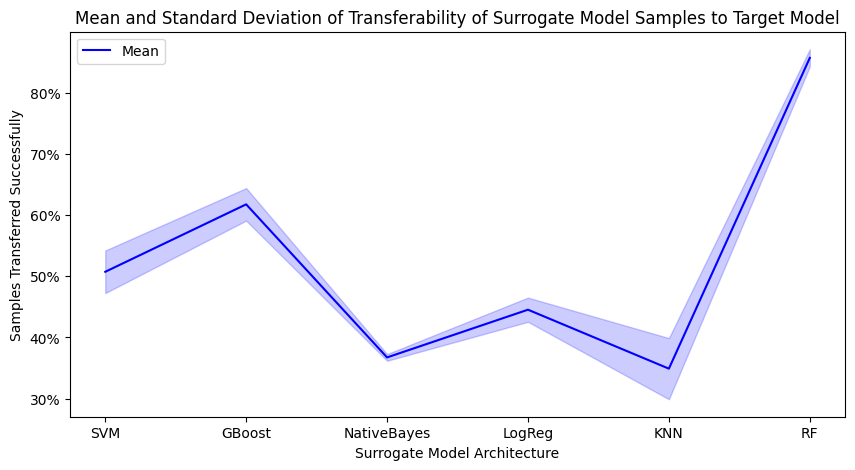

In [104]:
# chose the plot labels
title = "Mean and Standard Deviation of Transferability of Surrogate Model Samples to Target Model"
# title = "Average Target Confidence Reduction"
xlabel = "Surrogate Model Architecture"
ylabel = "Samples Transferred Successfully"
# ylabel = "Average Confidence Reduction in Target Model Predictions"


# plot the mean, std of the results with config groups on x-axis and samples_evaded_percentage on y-axis
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import PercentFormatter

data = np.array(config_groups_results)

means = [np.mean(group) for group in data]
std_devs = [np.std(group) for group in data]
print(f"Means: {means}")
print(f"Std Devs: {std_devs}")

plt.figure(figsize=(10, 5))
plt.plot(groups, means, label="Mean", color="blue")


plt.fill_between(
    groups,
    np.array(means) - np.array(std_devs),
    np.array(means) + np.array(std_devs),
    color="blue",
    alpha=0.2,
)

plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.title(title)
plt.legend()

plt.gca().yaxis.set_major_formatter(PercentFormatter(1, decimals=0))
plt.show()